In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df1 = pd.read_csv("./data/등산로/등산로 관심인구 정보.csv", encoding="cp949")

df1 = df1[['extrc_word_nm', 'auser_sxdst_cd', 'age_group_cd', 'hshld_incm_group_nm', 'mrrg_yn_nm', 'chdrn_yn_nm', 'auser_ara_ctprv_nm']] # column 추출

df1 = df1.rename(columns = {'extrc_word_nm':'추출단어명'}) # column 이름 변경
df1 = df1.rename(columns = {'auser_sxdst_cd':'성별'})
df1 = df1.rename(columns = {'age_group_cd':'나이대'})
df1 = df1.rename(columns = {'hshld_incm_group_nm':'소득(만원)'})
df1 = df1.rename(columns = {'mrrg_yn_nm':'결혼여부'})
df1 = df1.rename(columns = {'chdrn_yn_nm':'자녀여부'})
df1 = df1.rename(columns = {'auser_ara_ctprv_nm':'거주지역'})

df1['소득(만원)'] = df1['소득(만원)'].str.strip('만원') # '소득' column의 '만원' 제거
df1.head()

,추출단어명,성별,나이대,소득(만원),결혼여부,자녀여부,거주지역
0,지리산,M,3,600~699,아니오,,서울
1,지리산,M,3,600~699,아니오,,서울
2,서운산,M,4,900~999,예,자녀 있음,서울
3,서운산,M,4,900~999,예,자녀 있음,서울
4,서운산,M,4,900~999,예,자녀 있음,서울


In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30692 entries, 0 to 30691
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   추출단어명   30692 non-null  object
 1   성별      30692 non-null  object
 2   나이대     30692 non-null  int64 
 3   소득(만원)  30665 non-null  object
 4   결혼여부    30692 non-null  object
 5   자녀여부    30692 non-null  object
 6   거주지역    30692 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.6+ MB


In [54]:
# mylist = df1['나이대'].value_counts()

mylist = df1.loc[df1['나이대'] != 1, :]
mylist = df1.loc[df1['나이대'] != 6, :]

mylist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30650 entries, 0 to 30691
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   추출단어명   30650 non-null  object
 1   성별      30650 non-null  object
 2   나이대     30650 non-null  int64 
 3   소득(만원)  30629 non-null  object
 4   결혼여부    30650 non-null  object
 5   자녀여부    30650 non-null  object
 6   거주지역    30650 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.9+ MB


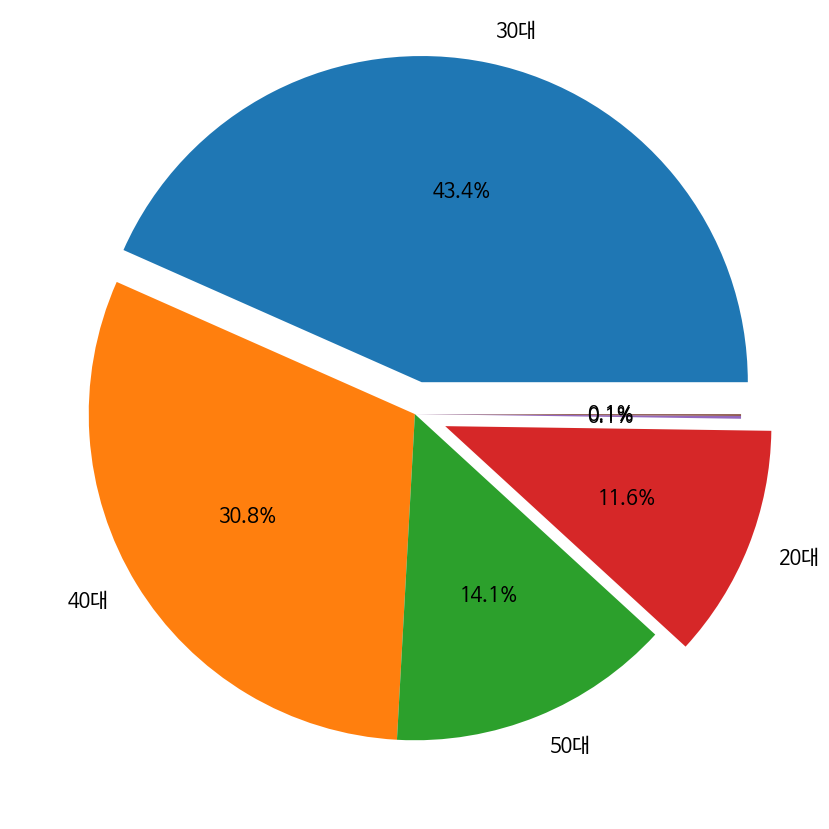

In [58]:
labels = ['30대', '40대', '50대', '20대', '', '']
explode = (0.1, 0, 0, 0.1, 0, 0)

mylist = df1['나이대'].value_counts()


plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기

plt.rc('font', family = 'NanumBarunGothic')
# plt.rcParams['figure.figsize'] = (5, 5)
fig = plt.figure(figsize = (15, 15))
fig.set_facecolor('white')
ax = fig.add_subplot()
#mylist.plot(kind = 'pie', autopct = lambda p : '{:.2f}%'.format(p))
plt.pie(mylist, autopct='%0.1f%%', labels = labels, explode = explode)
#plt.legend(mylist)
plt.show()